In [1]:
import requests
url = "https://cgu-odisha.ac.in/wp-content/uploads/2025/12/Ph.-D.-Notification-18080003.pdf"
response = requests.get(url)
with open("phd_notification.pdf", "wb") as f:
    f.write(response.content)

In [14]:
import base64
from io import BytesIO

def encode_pil_image(image):
    buffer = BytesIO()
    image.save(buffer, format="PNG")
    return base64.b64encode(buffer.getvalue()).decode("utf-8")


In [16]:
from pdf2image import convert_from_path

In [15]:
images = convert_from_path(
    "phd_notification.pdf",
    poppler_path=r"D:\abhi_project\Release-25.12.0-0\poppler-25.12.0\Library\bin",
    dpi=300
)

image_base64 = encode_pil_image(images[0])  # first page


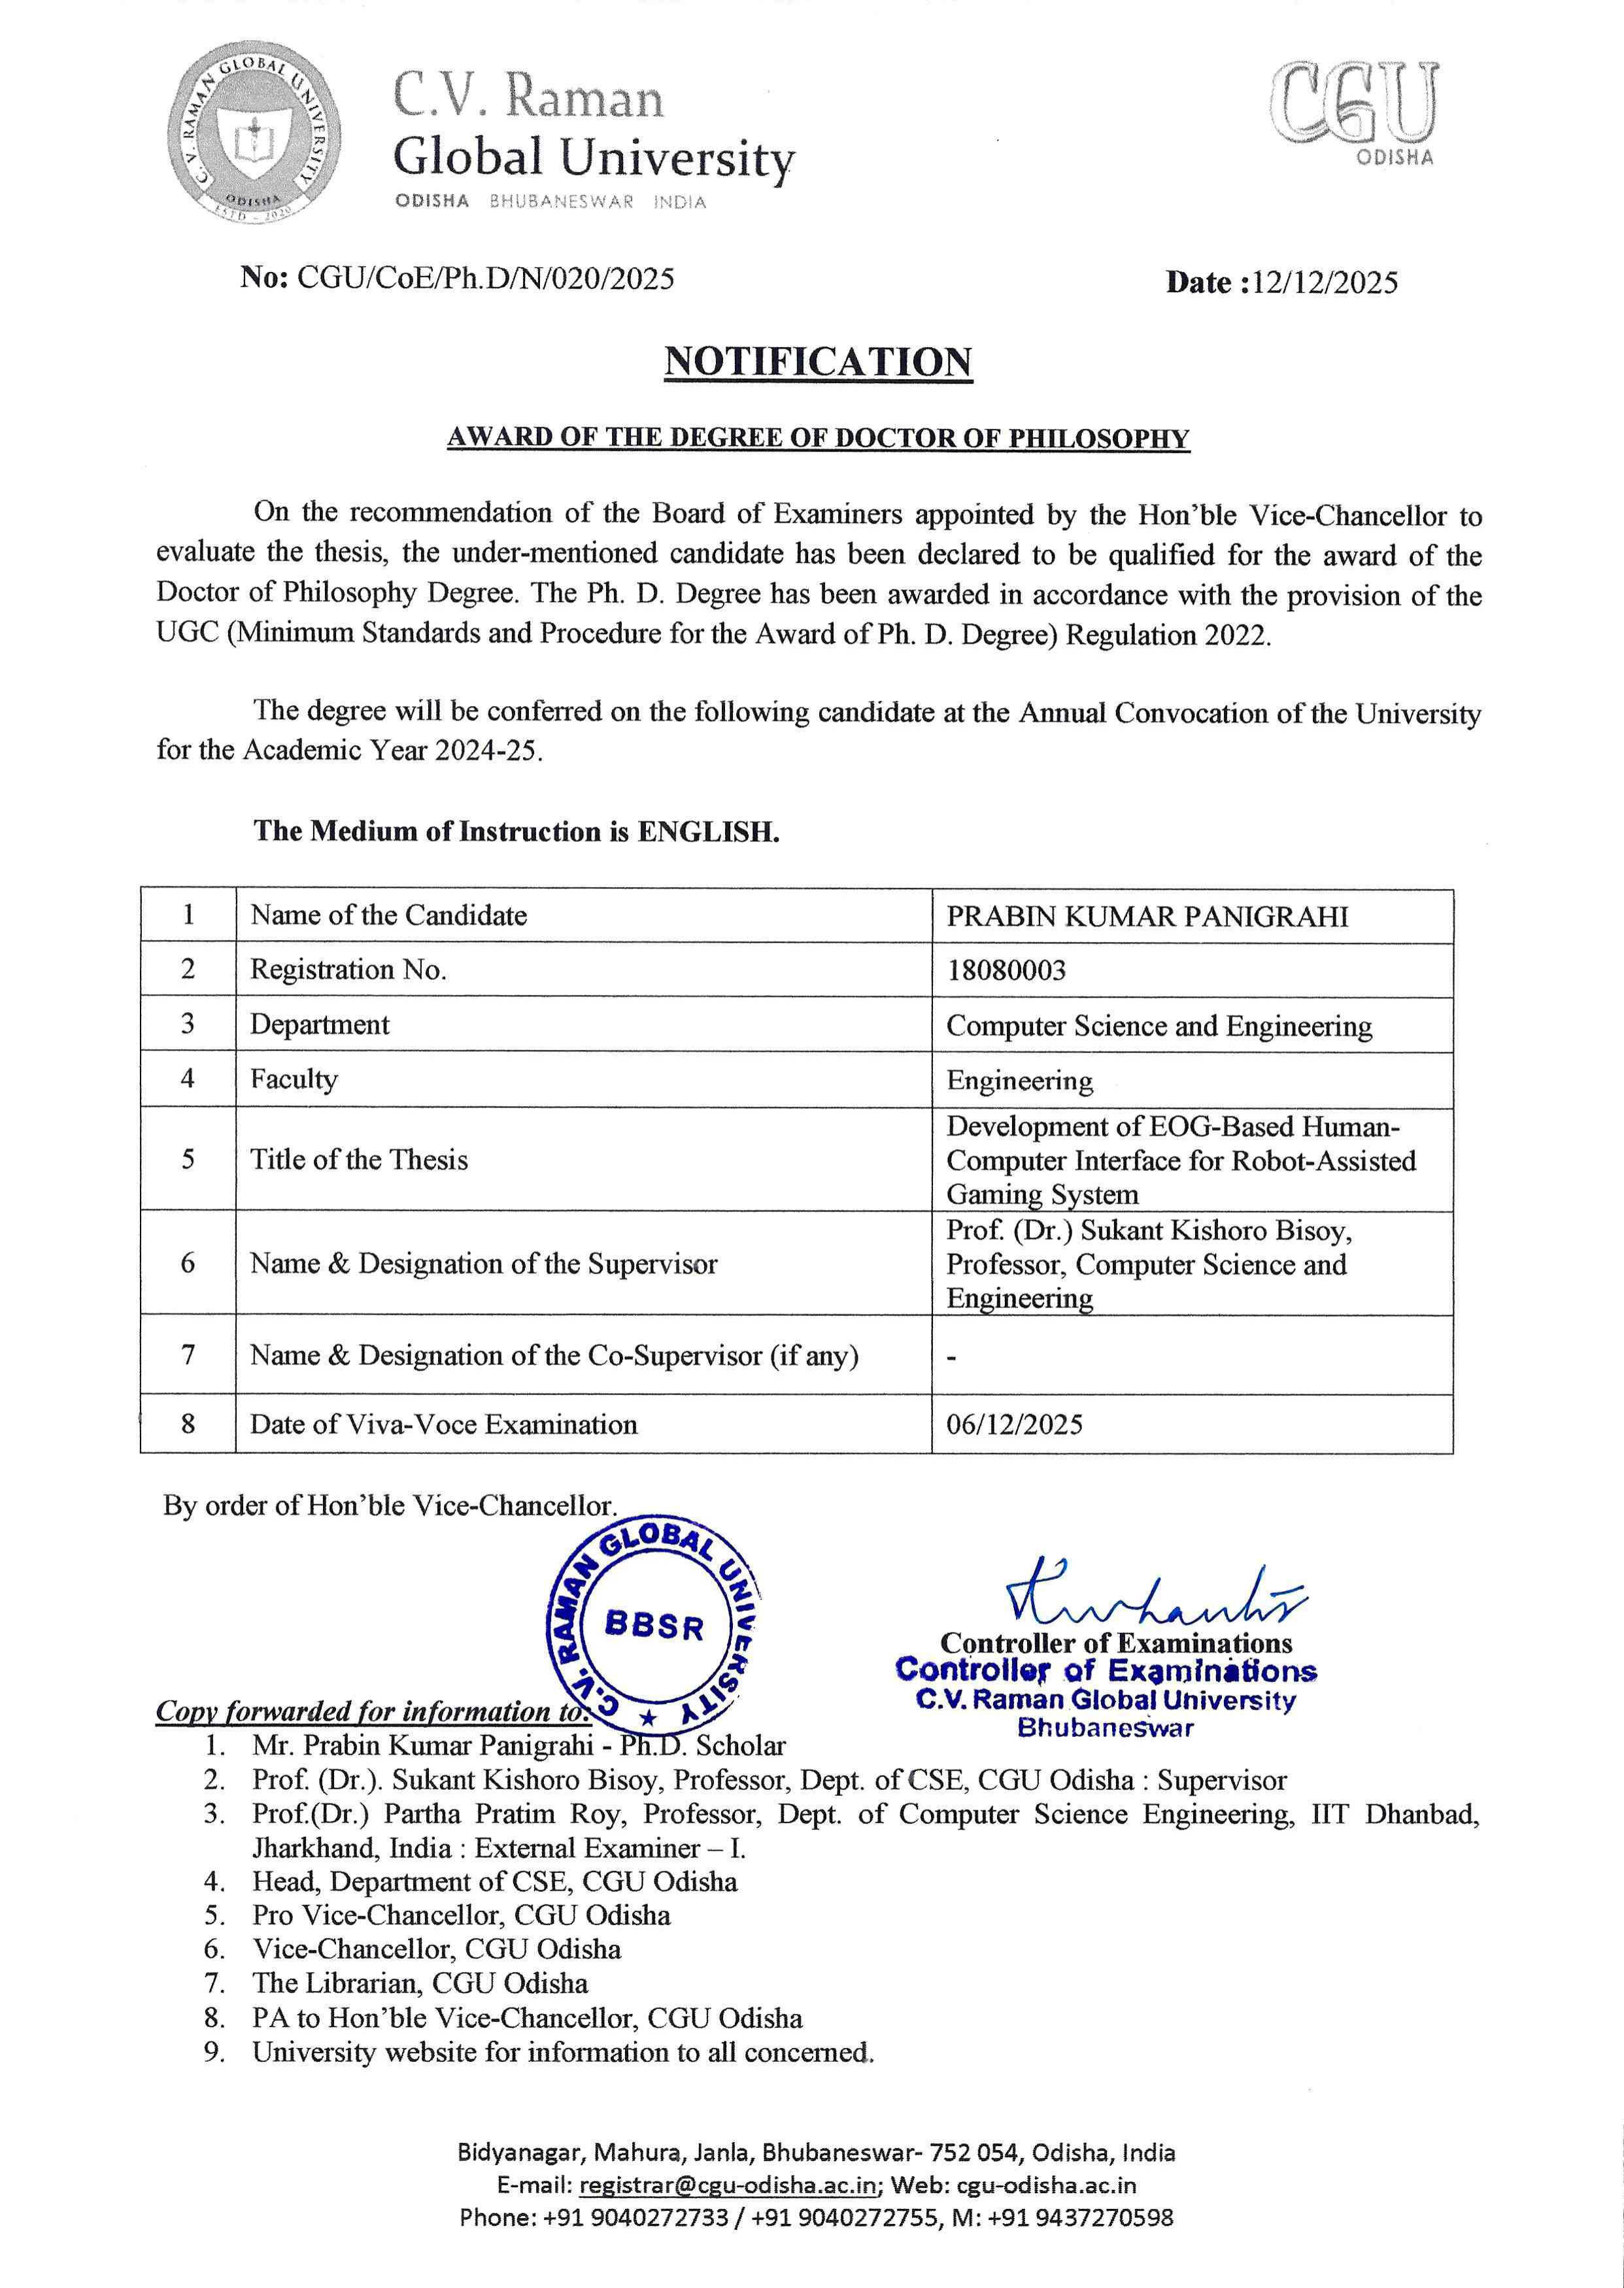

In [8]:
from IPython.display import display

display(images[0])

In [18]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
import requests
from pdf2image import convert_from_bytes
import base64
from io import BytesIO

def pdf_url_to_base64_in_memory(pdf_url: str):
    # Fetch PDF (still required)
    response = requests.get(pdf_url, timeout=30)
    response.raise_for_status()

    # Convert PDF bytes → images
    images = convert_from_bytes(response.content,    
                poppler_path=r"D:\abhi_project\Release-25.12.0-0\poppler-25.12.0\Library\bin",
                dpi=300)

    # Encode first page
    buffer = BytesIO()
    images[0].save(buffer, format="PNG")

    return base64.b64encode(buffer.getvalue()).decode("utf-8")


In [5]:
from langchain.chat_models import init_chat_model
from langchain.messages import HumanMessage,SystemMessage

model = init_chat_model("gpt-4o-mini")
image_base64 = pdf_url_to_base64_in_memory("https://cgu-odisha.ac.in/wp-content/uploads/2025/12/Ph.-D.-Notification-18080003.pdf")
messages = [
    SystemMessage(
        content=(
            "You are summarizing a scanned academic document page "
            "for a Retrieval-Augmented Generation (RAG) system."
        )
    ),
    HumanMessage(
        content=[
            {
                "type": "text",
                "text": (
                    "Give a detailed, factual summary of this page. "
                    "Extract all dates, rules, tables, headings, and instructions. "
                    "Do not miss any information."
                )
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/png;base64,{image_base64}"
                }
            }
        ]
    )
]

response = model.invoke(messages)
print(response.content)


### Summary of the Document

**C.V. Raman Global University Notification**

**Document Details:**
- **Document Number:** CGU/CoE/Ph.D/N/020/2025
- **Date:** 12/12/2025

**Award Notification:**
- The notification announces the award of the Doctor of Philosophy (Ph.D.) degree to the candidate named below, based on the recommendation of the Board of Examiners.

**Degree Details:**
- The Ph.D. degree has been awarded in accordance with the UGC (University Grants Commission) Minimum Standards and Procedure for the Award of Ph.D. Degree Regulation 2022.
- The degree will be conferred at the **Annual Convocation** of the university for the **Academic Year 2024-25**.

**Medium of Instruction:** English

### Candidate Information

| **Details**                     | **Information**                                                                                                           |
|---------------------------------|-------------------------------------------------------------------------

In [40]:
import re

def safe_filename(title: str) -> str:
    title = title.strip().lower()
    title = re.sub(r"[^\w\s-]", "", title)
    title = re.sub(r"\s+", "_", title)
    return title


In [41]:
import pandas as pd
import requests
from pdf2image import convert_from_path
from io import BytesIO
import base64
import os

In [42]:
def encode_pil_image(image):
    buffer = BytesIO()
    image.save(buffer, format="PNG")
    return base64.b64encode(buffer.getvalue()).decode("utf-8")


In [43]:
def download_pdf(url: str, save_path: str):
    response = requests.get(url, timeout=30)
    response.raise_for_status()

    with open(save_path, "wb") as f:
        f.write(response.content)


In [44]:
import os

DATA_DIR = "data"
PDF_DIR = os.path.join(DATA_DIR, "pdfs")

os.makedirs(PDF_DIR, exist_ok=True)


In [45]:
def process_pdf(title: str, pdf_url: str, poppler_path: str):
    filename = safe_filename(title) + ".pdf"
    pdf_path = os.path.join(PDF_DIR, filename)

    # 1. Download (only if not already downloaded)
    if not os.path.exists(pdf_path):
        download_pdf(pdf_url, pdf_path)

    # 2. Convert to images
    images = convert_from_path(
        pdf_path,
        poppler_path=poppler_path,
        dpi=300
    )

    # 3. Encode first page
    image_base64 = encode_pil_image(images[0])

    return {
        "title": title,
        "pdf_file": pdf_path,
        "num_pages": len(images),
        "first_page_base64": image_base64
    }


In [28]:
%pwd

'd:\\abhi_project\\research'

In [29]:
os.chdir("d:/abhi_project/")
%pwd

'd:\\abhi_project'

In [ ]:
poppler_path = r"D:\abhi_project\Release-25.12.0-0\poppler-25.12.0\Library\bin"

df = pd.read_csv("examination_details.csv")

results = []

for _, row in df.iterrows():
    try:
        result = process_pdf(
            title=row["Title"],       # Capital T
            pdf_url=row["PDF_Link"],  # Correct column name
            poppler_path=poppler_path
        )
        
        results.append(result)
        print(f"✅ Processed: {row['Title']}")  # Capital T

    except Exception as e:
        print(f"❌ Failed: {row['Title']} → {e}")  # Capital T


✅ Processed: Ph. D. Notification – 18080003
✅ Processed: Distribution of Admit Cards for the 1st Semester End Examination of UG, PG, and Ph.D. courses for the Academic Year 2025 – 26.
✅ Processed: Programme for Re-MID Term Examination of 1st Sem B.Tech courses 2025 – 26.
✅ Processed: Programme for 7th Sem (OE-II & OE-III) NPTEL Examination 2025 – 26.
✅ Processed: Ph. D. Notification – 2101070067
✅ Processed: Programme of Ph.D MID Term Examination 2025 – 26.
✅ Processed: Programme of Ph.D End Examination 2025 – 26
✅ Processed: Programme for End Semester Regular Examination of 1st Sem UG, PG & 3rd, 5th Sem B.Pharmacy courses 2025 – 26.
✅ Processed: Revised programme for End Semester Regular Examination of 1st Sem B.Tech courses 2025 – 26.
✅ Processed: Award of Degree of Doctor of Philosophy to “19080022 – Rupanita Das
✅ Processed: Admit Card distribution of Odd Sem End Exam 2025 – 26
✅ Processed: Award of Degree of Doctor of Philosophy to “2101070054 – Upasana Panigrahi”
✅ Processed: Awa